# Sep kaba-th, 2021

**Motivation**: This has the most succesfull registration of Nissl to Yale N162 0.1 mm <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import Allen
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
file = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-128/results/SVINET/bold_pearson_task-rest_sub-SLC10_ses-3_n128/p20/k6-real-euclidean-linksampling-(2021_09_14)'
file = pjoin(file, 'gam.npy')
gam = np.load(file)
gam.shape

(6, 138)

In [3]:
mice = Mice(Config(128, 1, 100, 'spatial'))
mice.combine_dfs()

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial_n-128

In [5]:
m = mice.al.get_masks('CH', True)
m.shape

(132, 80, 114)

<matplotlib.image.AxesImage object at 0x7f7fd3c09fd0>

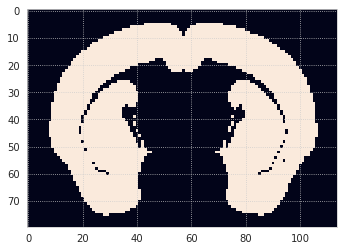

In [10]:
plt.imshow(m[60])

In [6]:
svinet = SVINET(mice, 6, 20)

AttributeError: 'NoneType' object has no attribute 'columns'

In [4]:
svinet = SVINET(, 6, 20)

AttributeError: 'NoneType' object has no attribute 'columns'

In [ ]:
def show(self, pi: np.ndarray = None, figsize=(13.5, 3.2)):
    mask = self.mice.parcel.results2d['parcel'].astype(bool)
    contour = self.mice.parcel.results2d.get('contour').astype(bool)

    # dense pi
    pi_arr = self.pi2arr(pi, cortex_only=True)
    trimmed = self.mice.parcel.trim_boundaries_2d(
        x={**pi_arr, 'contour': contour, 'mask': mask}, mask=mask)
    condition = np.logical_or(
        trimmed['contour'], np.invert(trimmed['mask']))
    oc_cortex = {
        idx: np.ma.masked_where(condition, trimmed[idx])
        for idx in range(1, self.num_k + 1)
    }

    # binary disjoint
    disjoint_masks = self.masks_from_pi(
        pi=pi, disjoint=True, cortex_only=True)
    disjoint_arr = {
        idx: project_vol_2d(m, self.mice.al.dims_flat, 'max_proj')
        for idx, m in disjoint_masks.items()
    }
    disjoint_trimmed = self.mice.parcel.trim_boundaries_2d(
        x=disjoint_arr, mask=mask)
    disjoint_cortex = {
        idx: np.ma.masked_where(condition, disjoint_trimmed[idx])
        for idx in range(1, self.num_k + 1)
    }

    # plot
    fig, axes = create_figure(2, self.num_k, figsize)
    for j in range(self.num_k):
        axes[0, j].imshow(oc_cortex[j + 1], cmap='rocket', vmin=0)
        axes[0, j].set_title(f"OC_{j + 1}", fontsize=9, y=1.05)
        axes[1, j].imshow(disjoint_cortex[j + 1], cmap=self.cmaps[j + 1])
        axes[1, j].set_facecolor('#2d3938')
    remove_ticks(axes)
    plt.show()
    return

In [ ]:
%%time
mice = Mice(Config(256, resolution=25), load_allen=True, load_parcel=True, load_preproc=True)

In [2]:
mice = Mice(Config(17, resolution=100), load_preproc=True)

In [3]:
from register.register import *
reg = Register(mice)

In [4]:
kwargs = {
    'types': ['SyN', 'SyNAggro'],
    'grads': [0.2, 0.3],
    'syn_bins': [16, 32],
    'aff_bins': [13, 20],
    'aff_rates': [0.2],
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'SyNAggro'],
    'grads': [0.2, 0.3],
    'syn_bins': [16, 32],
    'aff_bins': [13, 20],
    'aff_rates': [0.2],
    'mi_q': 0.5,
    'n_seeds': 10
}

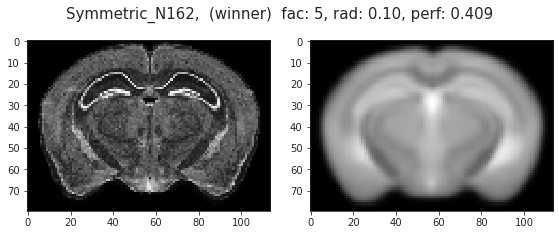

  0%|          | 0/10 [00:00<?, ?it/s]

Symmetric_N162, perf:
seed               4
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.987081

registering anat:  sub-SLC01_ses-1:   0%|          | 0/30 [00:00<?, ?it/s]

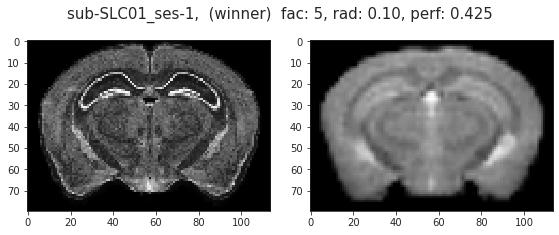

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC01_ses-1, perf:
seed               7
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.970946

registering anat:  sub-SLC01_ses-1:   0%|          | 0/30 [32:33<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-17/masks/sub-SLC01_ses-1_space-indiv-3d_iso-inv-cor.png'

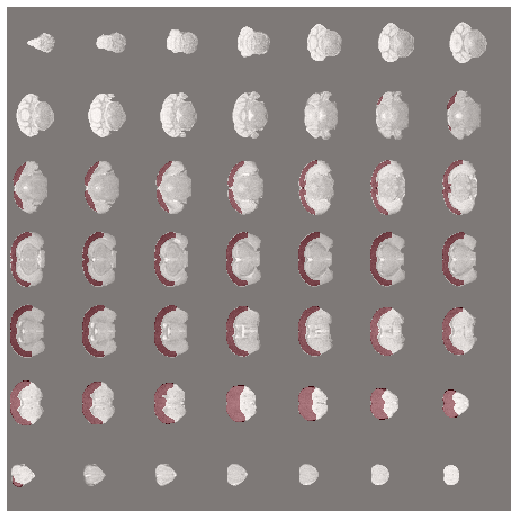

In [5]:
reg.register_anat(save_results=True, **kwargs)

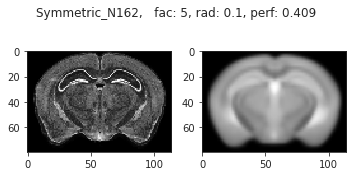

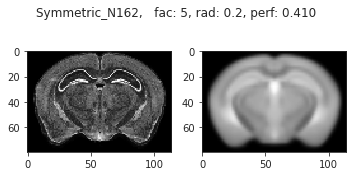

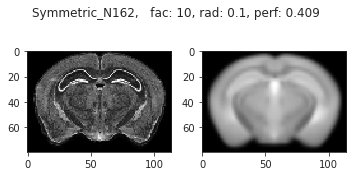

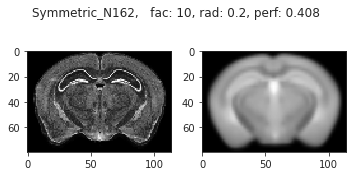

{
    'fac: 5, rad: 0.10': 0.40897511339278064,
    'fac: 5, rad: 0.20': 0.4099525098499613,
    'fac: 10, rad: 0.10': 0.4087588318326908,
    'fac: 10, rad: 0.20': 0.4080977078912497
}

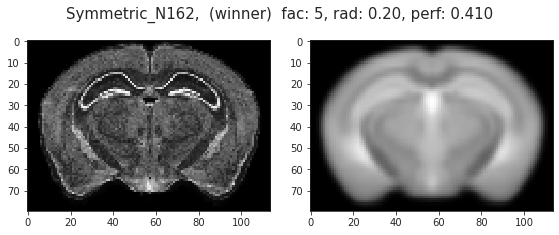

  0%|          | 0/10 [00:00<?, ?it/s]

Symmetric_N162, perf:
seed               9
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.994402

registering anat:  sub-SLC01_ses-1:   0%|          | 0/30 [00:00<?, ?it/s]

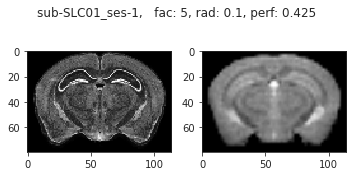

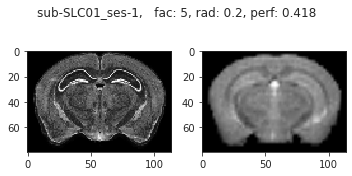

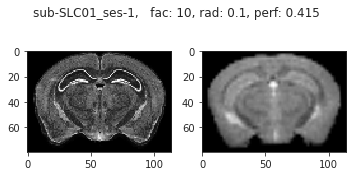

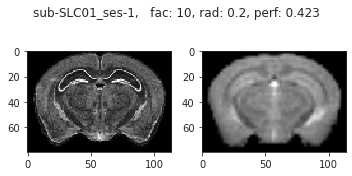

{
    'fac: 5, rad: 0.10': 0.424994107293971,
    'fac: 5, rad: 0.20': 0.41833226369509086,
    'fac: 10, rad: 0.10': 0.41533540686265225,
    'fac: 10, rad: 0.20': 0.42287758557863264
}

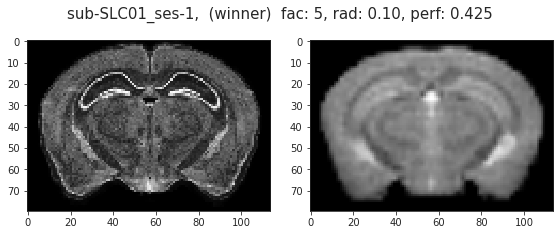

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC01_ses-1, perf:
seed               3
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.979919

registering anat:  sub-SLC01_ses-2:   3%|▎         | 1/30 [54:52<26:31:29, 3292.75s/it]

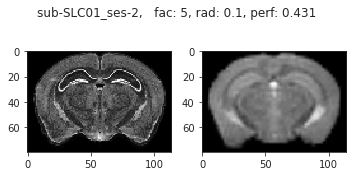

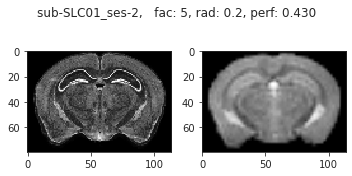

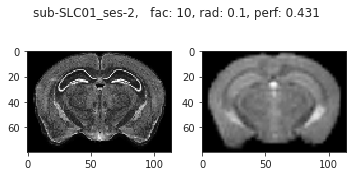

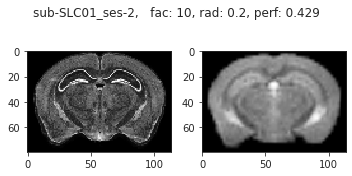

{
    'fac: 5, rad: 0.10': 0.4309807107494317,
    'fac: 5, rad: 0.20': 0.4299205279519728,
    'fac: 10, rad: 0.10': 0.4305957456903822,
    'fac: 10, rad: 0.20': 0.4285162402490301
}

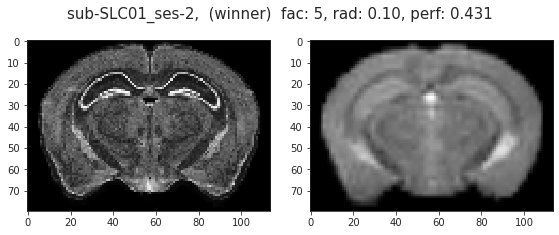

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC01_ses-2, perf:
seed               0
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score         0.9703

registering anat:  sub-SLC01_ses-3:   7%|▋         | 2/30 [1:49:39<25:35:00, 3289.30s/it]

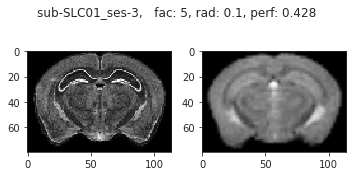

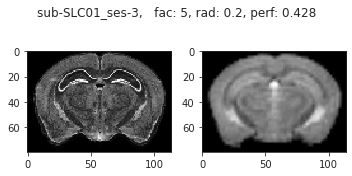

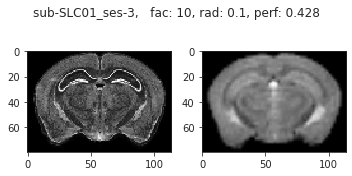

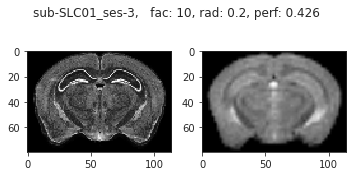

{
    'fac: 5, rad: 0.10': 0.4284734206212528,
    'fac: 5, rad: 0.20': 0.4278549530803701,
    'fac: 10, rad: 0.10': 0.42821849522069094,
    'fac: 10, rad: 0.20': 0.4256244960255919
}

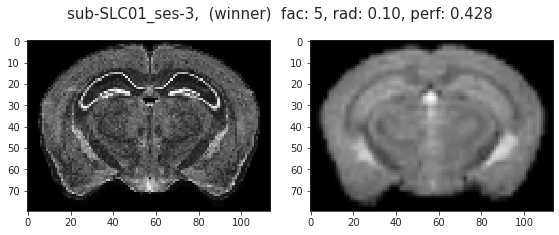

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC01_ses-3, perf:
seed               6
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.970761

registering anat:  sub-SLC02_ses-1:  10%|█         | 3/30 [2:46:17<25:02:35, 3339.08s/it]

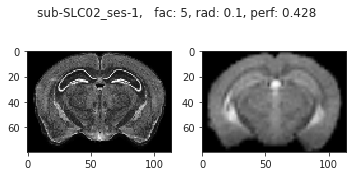

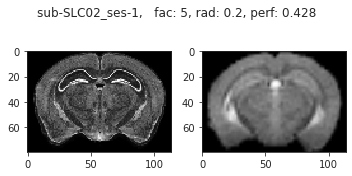

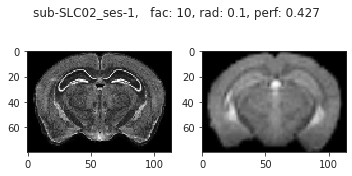

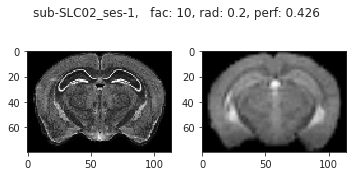

{
    'fac: 5, rad: 0.10': 0.4280266425928773,
    'fac: 5, rad: 0.20': 0.427643618063653,
    'fac: 10, rad: 0.10': 0.4273220874378138,
    'fac: 10, rad: 0.20': 0.42586975122012394
}

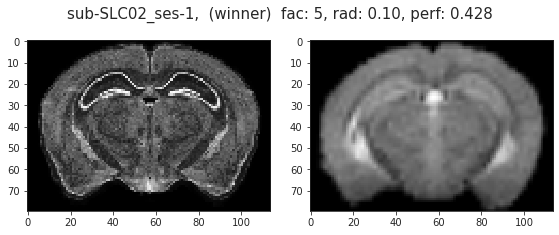

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC02_ses-1, perf:
seed               6
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.949519

registering anat:  sub-SLC02_ses-2:  13%|█▎        | 4/30 [3:39:35<23:42:41, 3283.13s/it]

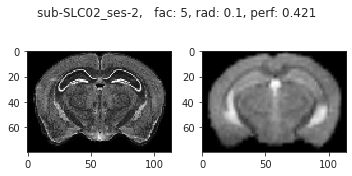

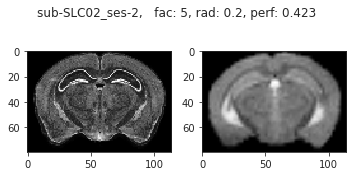

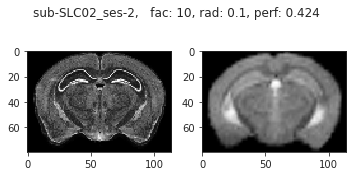

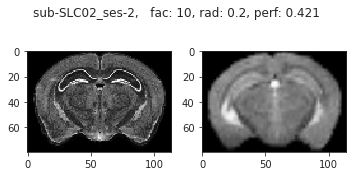

{
    'fac: 5, rad: 0.10': 0.42145673081094437,
    'fac: 5, rad: 0.20': 0.4231758652320484,
    'fac: 10, rad: 0.10': 0.42410216258061756,
    'fac: 10, rad: 0.20': 0.4207383670311209
}

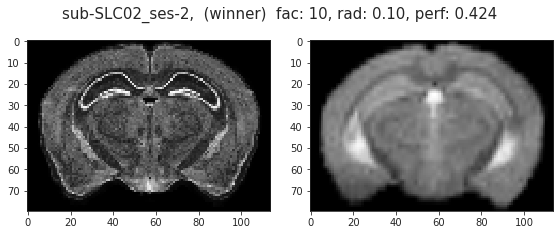

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC02_ses-2, perf:
seed               4
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.937784

registering anat:  sub-SLC02_ses-3:  17%|█▋        | 5/30 [4:33:29<22:40:34, 3265.39s/it]

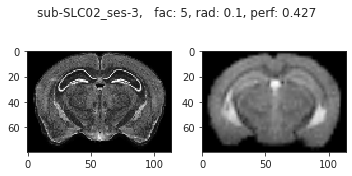

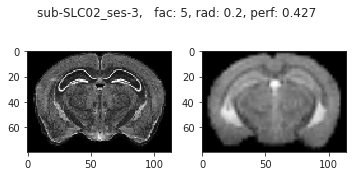

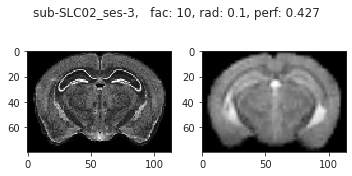

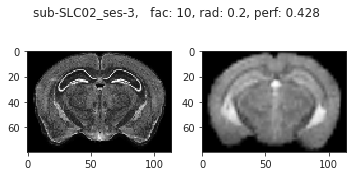

{
    'fac: 5, rad: 0.10': 0.4271485453615431,
    'fac: 5, rad: 0.20': 0.4273856670108458,
    'fac: 10, rad: 0.10': 0.4274712986479702,
    'fac: 10, rad: 0.20': 0.42848226893574354
}

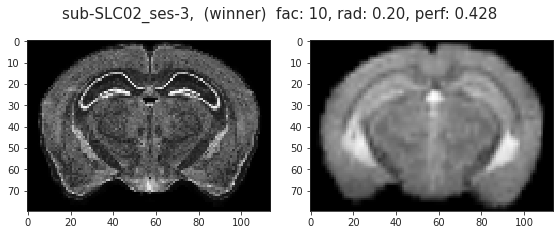

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC02_ses-3, perf:
seed               6
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.946566

registering anat:  sub-SLC03_ses-1:  20%|██        | 6/30 [5:27:21<21:41:37, 3254.05s/it]

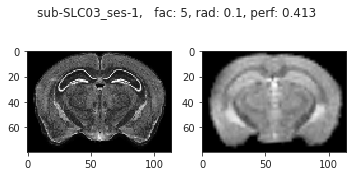

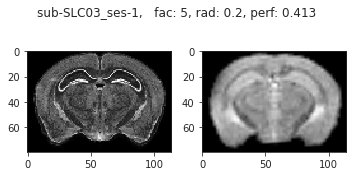

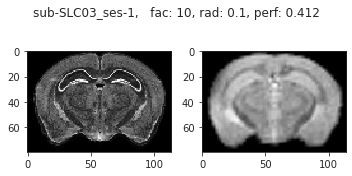

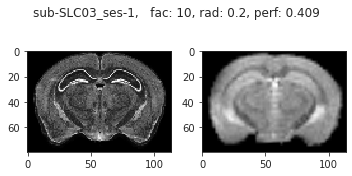

{
    'fac: 5, rad: 0.10': 0.4125989276067751,
    'fac: 5, rad: 0.20': 0.4130868075997236,
    'fac: 10, rad: 0.10': 0.4117430062723162,
    'fac: 10, rad: 0.20': 0.4094662607041321
}

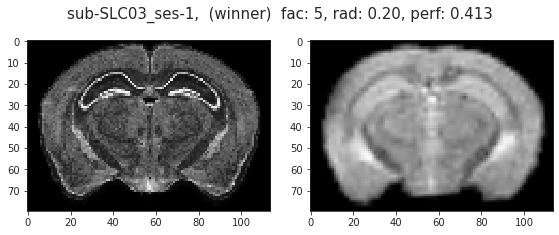

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC03_ses-1, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.959769

registering anat:  sub-SLC03_ses-2:  23%|██▎       | 7/30 [6:23:02<20:58:16, 3282.48s/it]

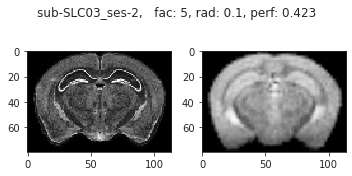

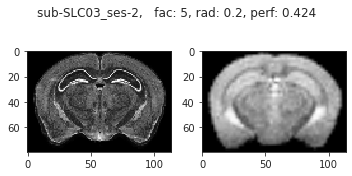

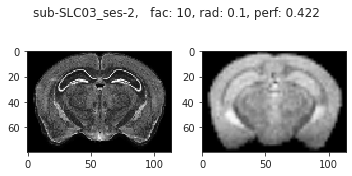

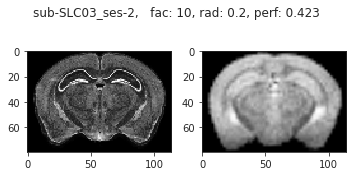

{
    'fac: 5, rad: 0.10': 0.4231778241041845,
    'fac: 5, rad: 0.20': 0.42375533986034103,
    'fac: 10, rad: 0.10': 0.4220328825186514,
    'fac: 10, rad: 0.20': 0.42348866754138126
}

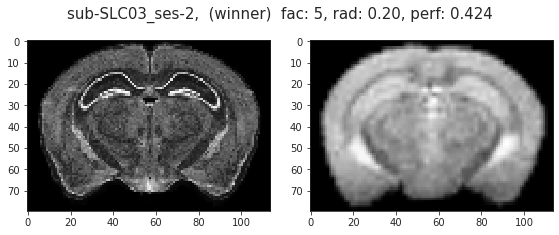

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC03_ses-2, perf:
seed               0
type             SyN
grad             0.2
syn_bin           32
aff_bin           32
aff_rate         0.5
metric           sym
score       0.965116

registering anat:  sub-SLC03_ses-3:  27%|██▋       | 8/30 [7:18:27<20:08:31, 3295.96s/it]

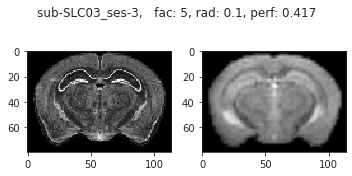

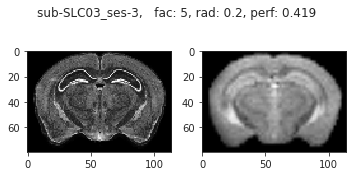

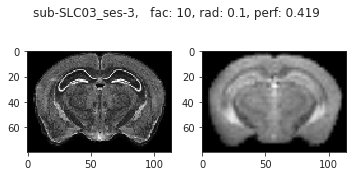

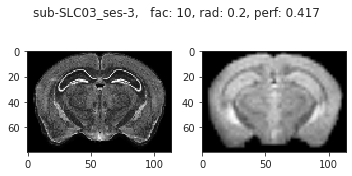

{
    'fac: 5, rad: 0.10': 0.4172094983249913,
    'fac: 5, rad: 0.20': 0.41906314376101733,
    'fac: 10, rad: 0.10': 0.4191538021843667,
    'fac: 10, rad: 0.20': 0.41668154769258314
}

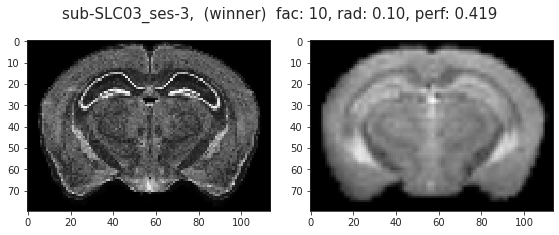

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC03_ses-3, perf:
seed               6
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.963279

registering anat:  sub-SLC04_ses-1:  30%|███       | 9/30 [8:12:56<19:10:40, 3287.62s/it]

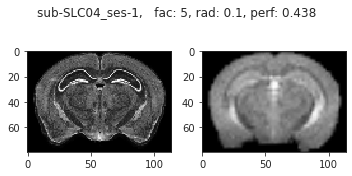

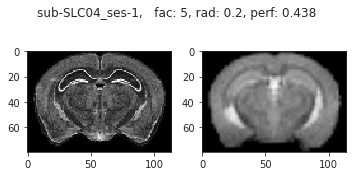

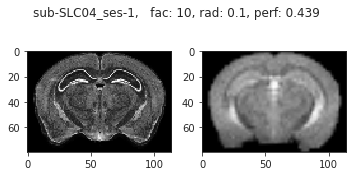

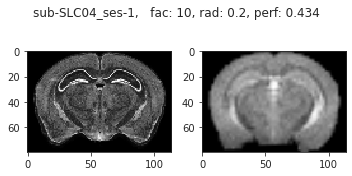

{
    'fac: 5, rad: 0.10': 0.4378258132027841,
    'fac: 5, rad: 0.20': 0.43770236855386896,
    'fac: 10, rad: 0.10': 0.4385250961453972,
    'fac: 10, rad: 0.20': 0.4338033649151914
}

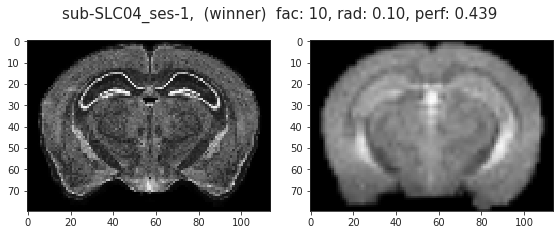

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC04_ses-1, perf:
seed               3
type        SyNAggro
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.967072

registering anat:  sub-SLC04_ses-2:  33%|███▎      | 10/30 [9:09:02<18:23:58, 3311.95s/it]

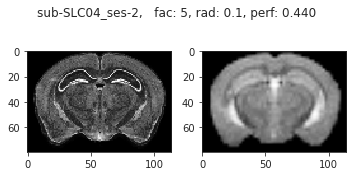

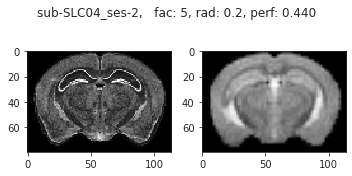

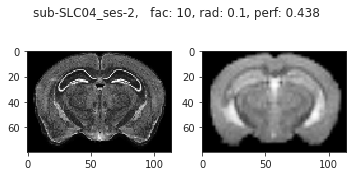

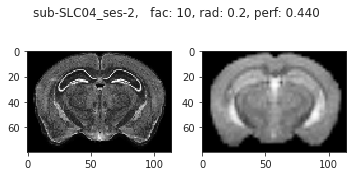

{
    'fac: 5, rad: 0.10': 0.44024239816977867,
    'fac: 5, rad: 0.20': 0.4402085163349112,
    'fac: 10, rad: 0.10': 0.4381287956260907,
    'fac: 10, rad: 0.20': 0.4397070065626486
}

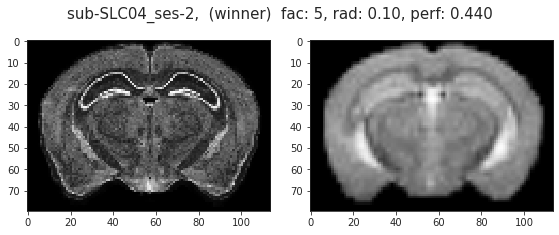

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC04_ses-2, perf:
seed               8
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.974392

registering anat:  sub-SLC04_ses-3:  37%|███▋      | 11/30 [10:04:25<17:29:50, 3315.29s/it]

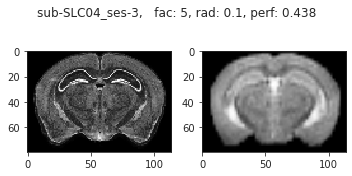

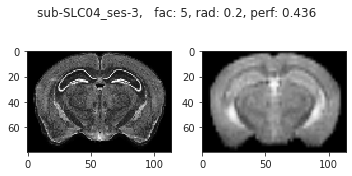

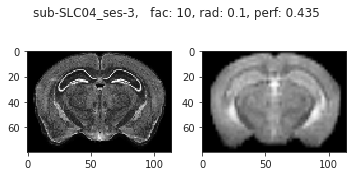

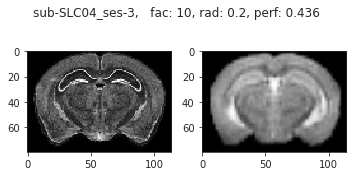

{
    'fac: 5, rad: 0.10': 0.4376110883091097,
    'fac: 5, rad: 0.20': 0.4358410683980051,
    'fac: 10, rad: 0.10': 0.43510024939181363,
    'fac: 10, rad: 0.20': 0.4359047416747815
}

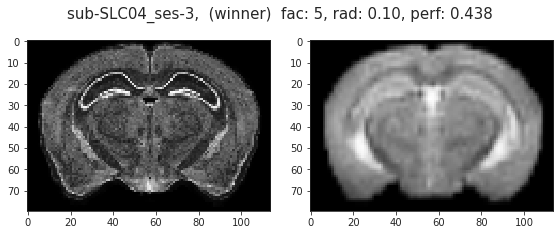

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC04_ses-3, perf:
seed               4
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.969222

registering anat:  sub-SLC05_ses-1:  40%|████      | 12/30 [11:00:31<16:39:12, 3330.69s/it]

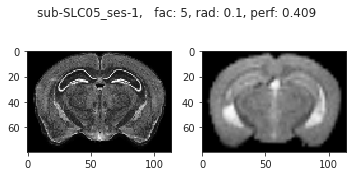

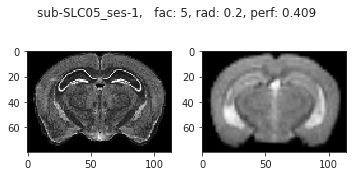

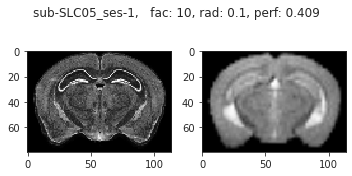

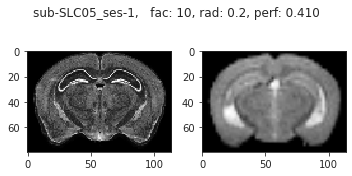

{
    'fac: 5, rad: 0.10': 0.4094645444551483,
    'fac: 5, rad: 0.20': 0.40947270533806684,
    'fac: 10, rad: 0.10': 0.409040850022255,
    'fac: 10, rad: 0.20': 0.4102424394523413
}

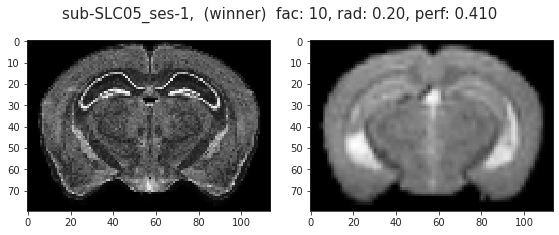

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC05_ses-1, perf:
seed               5
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.978603

registering anat:  sub-SLC05_ses-2:  43%|████▎     | 13/30 [11:55:20<15:40:08, 3318.15s/it]

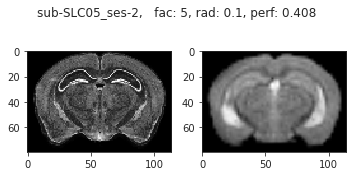

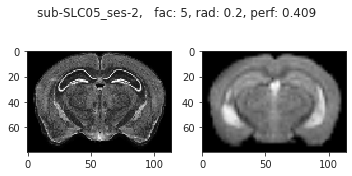

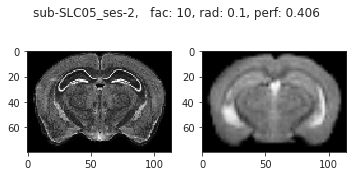

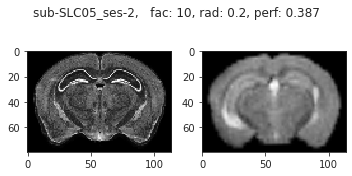

{
    'fac: 5, rad: 0.10': 0.4078996296826021,
    'fac: 5, rad: 0.20': 0.40881004201129945,
    'fac: 10, rad: 0.10': 0.40619923729190627,
    'fac: 10, rad: 0.20': 0.38728962583830756
}

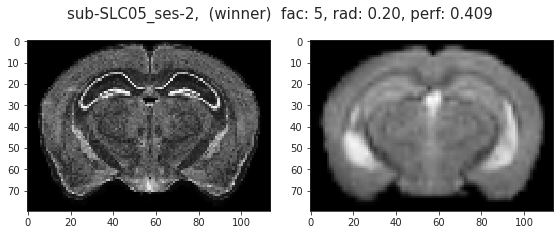

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC05_ses-2, perf:
seed               4
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.958803

registering anat:  sub-SLC05_ses-3:  47%|████▋     | 14/30 [12:50:35<14:44:33, 3317.09s/it]

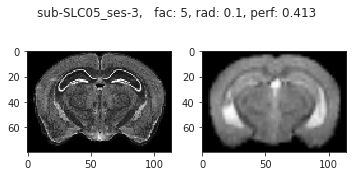

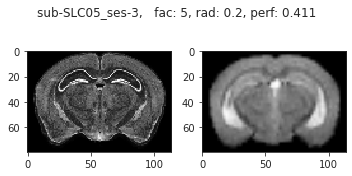

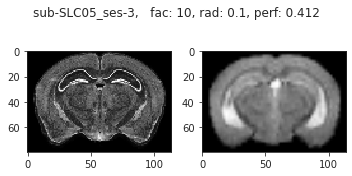

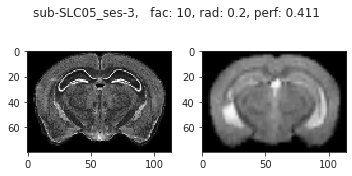

{
    'fac: 5, rad: 0.10': 0.4128658250010294,
    'fac: 5, rad: 0.20': 0.4114179985922351,
    'fac: 10, rad: 0.10': 0.4121190525970454,
    'fac: 10, rad: 0.20': 0.41057804371596024
}

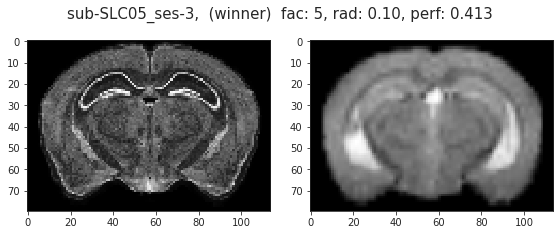

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC05_ses-3, perf:
seed               3
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.981015

registering anat:  sub-SLC06_ses-1:  50%|█████     | 15/30 [13:44:28<13:42:55, 3291.67s/it]

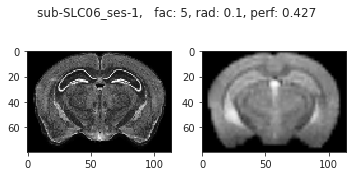

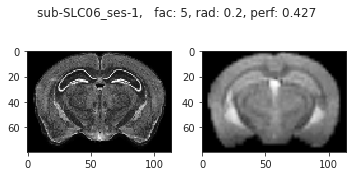

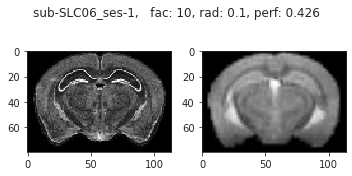

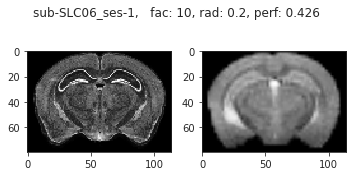

{
    'fac: 5, rad: 0.10': 0.4270204036393664,
    'fac: 5, rad: 0.20': 0.42660997481200896,
    'fac: 10, rad: 0.10': 0.4258474584242362,
    'fac: 10, rad: 0.20': 0.4261428696261633
}

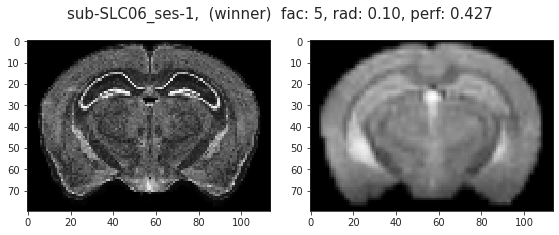

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC06_ses-1, perf:
seed               5
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.946086

registering anat:  sub-SLC06_ses-2:  53%|█████▎    | 16/30 [14:38:36<12:45:00, 3278.58s/it]

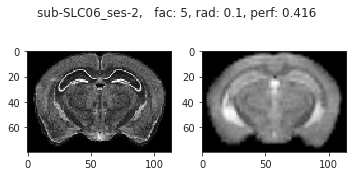

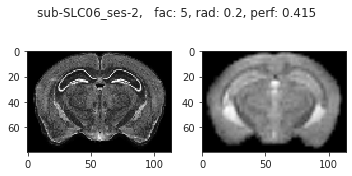

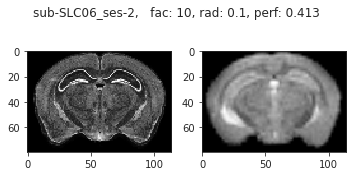

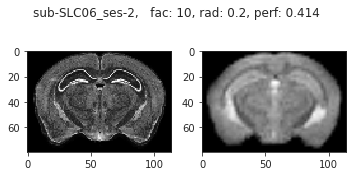

{
    'fac: 5, rad: 0.10': 0.4156490319422594,
    'fac: 5, rad: 0.20': 0.4154412942098065,
    'fac: 10, rad: 0.10': 0.41308901031347783,
    'fac: 10, rad: 0.20': 0.4136913049286427
}

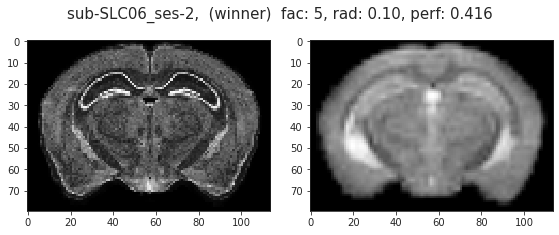

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC06_ses-2, perf:
seed               3
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.940907

registering anat:  sub-SLC06_ses-3:  57%|█████▋    | 17/30 [15:32:46<11:48:31, 3270.12s/it]

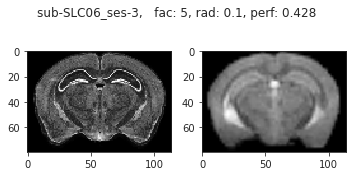

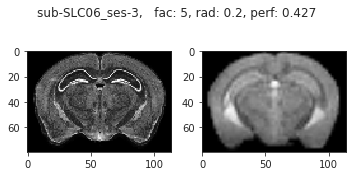

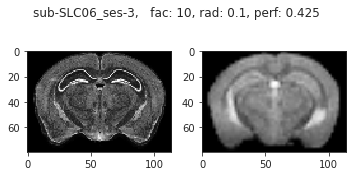

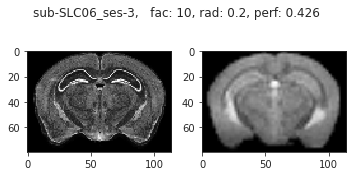

{
    'fac: 5, rad: 0.10': 0.4277991190545364,
    'fac: 5, rad: 0.20': 0.42660632513796354,
    'fac: 10, rad: 0.10': 0.42488410537462684,
    'fac: 10, rad: 0.20': 0.42626334878845157
}

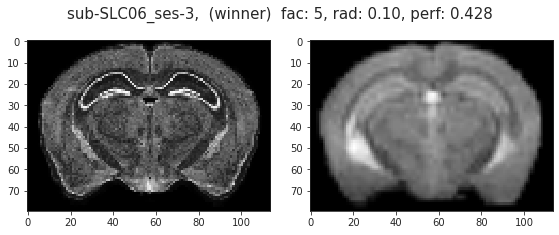

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC06_ses-3, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.959941

registering anat:  sub-SLC07_ses-1:  60%|██████    | 18/30 [16:26:57<10:52:51, 3264.29s/it]

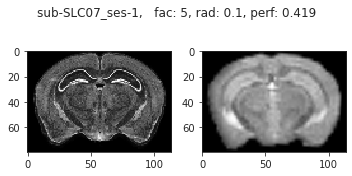

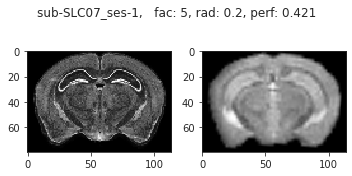

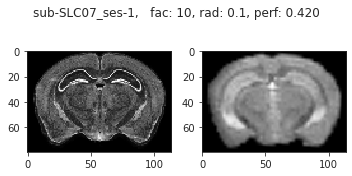

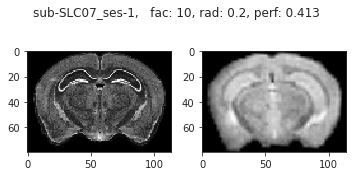

{
    'fac: 5, rad: 0.10': 0.4193187743650372,
    'fac: 5, rad: 0.20': 0.4206489804154522,
    'fac: 10, rad: 0.10': 0.41954356546114413,
    'fac: 10, rad: 0.20': 0.41275554826890937
}

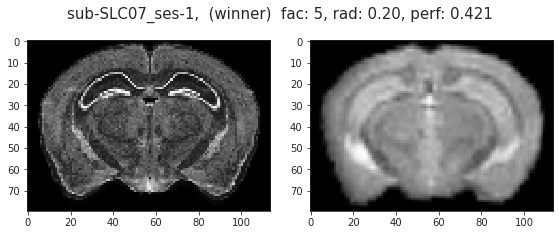

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC07_ses-1, perf:
seed               3
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score        0.95222

registering anat:  sub-SLC07_ses-2:  63%|██████▎   | 19/30 [17:21:42<9:59:35, 3270.47s/it] 

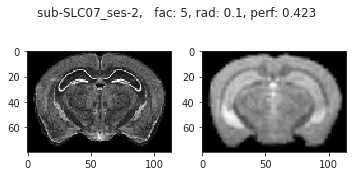

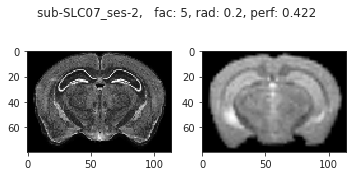

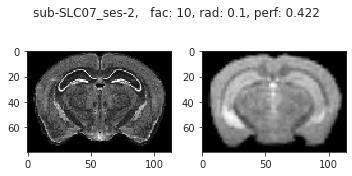

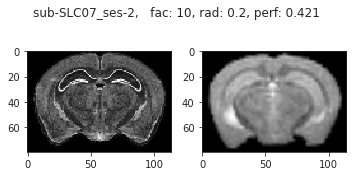

{
    'fac: 5, rad: 0.10': 0.42262772235469515,
    'fac: 5, rad: 0.20': 0.4215400839970252,
    'fac: 10, rad: 0.10': 0.4222190669500494,
    'fac: 10, rad: 0.20': 0.4211242119887085
}

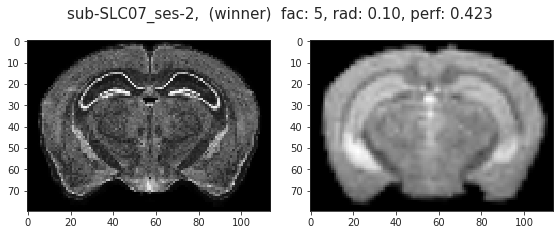

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC07_ses-2, perf:
seed               3
type             SyN
grad             0.2
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.943787

registering anat:  sub-SLC07_ses-3:  67%|██████▋   | 20/30 [18:17:53<9:10:06, 3300.68s/it]

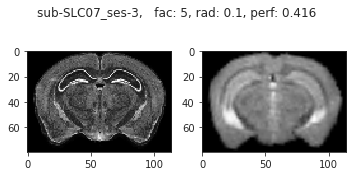

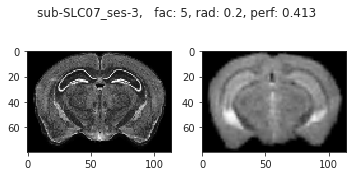

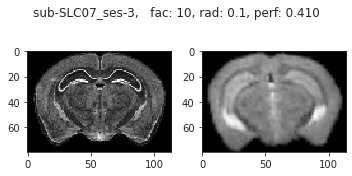

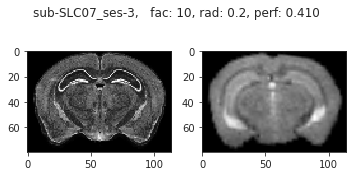

{
    'fac: 5, rad: 0.10': 0.4158642801727713,
    'fac: 5, rad: 0.20': 0.4128678237684909,
    'fac: 10, rad: 0.10': 0.40985905023198804,
    'fac: 10, rad: 0.20': 0.40950701507795095
}

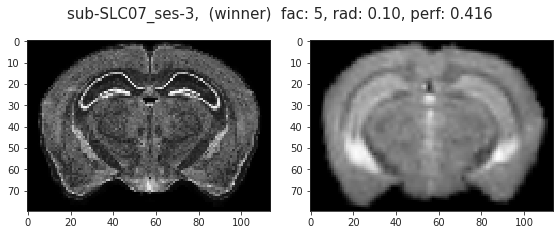

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC07_ses-3, perf:
seed               5
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.5
metric           sym
score       0.951776

registering anat:  sub-SLC08_ses-1:  70%|███████   | 21/30 [19:13:26<8:16:31, 3310.21s/it]

In [ ]:
reg.register_anat(save_results=True, **kwargs)

In [ ]:
key = 'sub-SLC06_ses-1'

reg.fit_register(
    mode='3d',
    name=key
    fixed=
    **kwargs,)

In [3]:
mice.al = Allen(25)

In [4]:
mice.cfg.resolution = 25

In [5]:
from register.register import *
reg = Register(mice, in_house_res=100)

In [7]:
reg.objects

{
    'misc': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (1320, 800, 1140)
         Spacing    : (10.0, 10.0, 10.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'iso': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (1320, 800, 1140)
         Spacing    : (10.0, 10.0, 10.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'hemis': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (1320, 800, 1140)
         Spacing    : (10.0, 10.0, 10.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

}

<matplotlib.image.AxesImage object at 0x7e44ee6003d0>

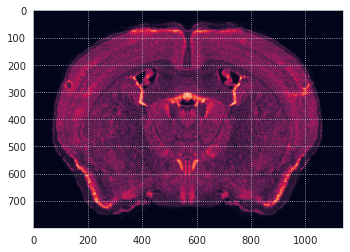

In [11]:
plt.imshow(reg.nissl.numpy()[600])

In [14]:
sys.getsizeof(reg.nissl.numpy()) / 1e9

4.815360136

## Before

In [5]:
_dir = '/home/hadi/Dropbox/git/jb-Ca-fMRI/nb/sep21/sep26_dfs'
df = pd.read_pickle(pjoin(_dir, 'sub-SLC01_ses-1.df'))

In [6]:
df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 0 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 mi 
 0.489101 
 
 
 1 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 sym_iso 
 0.995775 
 
 
 2 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 sym_vis 
 0.900850 
 
 
 3 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 ovp_iso 
 0.965855 
 
 
 4 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 ovp_vis 
 0.965248 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 5693 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym_vis_fixed 
 0.941349 
 
 
 5694 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 ovp_iso_fixed 
 1.000000 
 
 
 5695 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 ovp_vis_fixed 
 1.000000 
 
 
 5696 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym_fixed 
 0.978662 
 
 
 5697 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 ovp_fixed 
 1.000000 
 
 
 
 5698 rows × 8 columns

In [8]:
_df = df.loc[
    (df['seed'] == 1) &
    (df['type'] == 'SyN') &
    (df['grad'] == 0.2) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 20) &
    (df['aff_rate'] == 0.2)
]
_df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 700 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.455085 
 
 
 701 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 sym_iso 
 0.998723 
 
 
 702 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 sym_vis 
 1.000000 
 
 
 703 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 ovp_iso 
 0.956971 
 
 
 704 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 ovp_vis 
 0.953803 
 
 
 705 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 sym 
 0.999042 
 
 
 706 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 ovp 
 0.956179 
 
 
 707 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 mi_fixed 
 0.326393 
 
 
 708 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 sym_iso_fixed 
 0.998349 
 
 
 709 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 sym_vis_fixed 
 0.996212 
 
 
 710 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 ovp_iso_fixed 
 1.000000 
 
 
 711 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 ovp_vis_fixed 
 1.000000 
 
 
 712 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 sym_fixed 
 0.997815 
 
 
 713 
 1 
 SyN 
 0.2 
 32 
 20 
 0.2 
 ovp_fixed 
 1.000000

In [52]:
_df = df.loc[
    (df['seed'] == 1) &
    (df['type'] == 'ElasticSyN') &
    (df['grad'] == 0.3) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 20) &
    (df['aff_rate'] == 0.2)
]
_df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 1120 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 mi 
 0.499643 
 
 
 1121 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_iso 
 0.995365 
 
 
 1122 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_vis 
 0.975434 
 
 
 1123 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_iso 
 0.967695 
 
 
 1124 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_vis 
 0.965157 
 
 
 1125 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.990382 
 
 
 1126 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp 
 0.967060 
 
 
 1127 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 mi_fixed 
 0.328362 
 
 
 1128 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_iso_fixed 
 0.991790 
 
 
 1129 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_vis_fixed 
 0.969072 
 
 
 1130 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_iso_fixed 
 1.000000 
 
 
 1131 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_vis_fixed 
 1.000000 
 
 
 1132 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_fixed 
 0.986111 
 
 
 1133 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_fixed 
 1.000000

<matplotlib.lines.Line2D object at 0x7e9fb7ca4490>

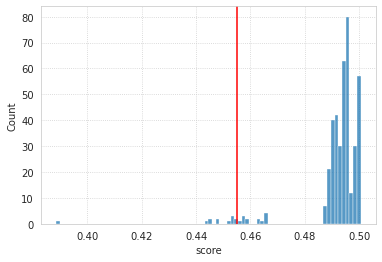

In [17]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])
plt.axvline(0.455085, color='r')

In [18]:
np.nanquantile(df.loc[df['metric'] == 'mi', 'score'].values, [0.25, 0.50, 0.75, 0.9999])

array([0.49124635, 0.49417082, 0.49633862, 0.50050671])

In [20]:
qs = np.nanquantile(df.loc[df['metric'] == 'mi', 'score'].values, [0.25, 0.50, 0.75, 0.9999])
qs

array([0.49124635, 0.49417082, 0.49633862, 0.50050671])

In [ ]:
df #= df.loc[df['metric'] == 'mi', 'score']

In [22]:
df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 0 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 mi 
 0.489101 
 
 
 1 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 sym_iso 
 0.995775 
 
 
 2 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 sym_vis 
 0.900850 
 
 
 3 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 ovp_iso 
 0.965855 
 
 
 4 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 ovp_vis 
 0.965248 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 5693 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym_vis_fixed 
 0.941349 
 
 
 5694 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 ovp_iso_fixed 
 1.000000 
 
 
 5695 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 ovp_vis_fixed 
 1.000000 
 
 
 5696 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym_fixed 
 0.978662 
 
 
 5697 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 ovp_fixed 
 1.000000 
 
 
 
 5698 rows × 8 columns

In [41]:
df_mi = df.loc[df['metric'] == 'mi']
df_sym = df.loc[df['metric'] == 'sym']
df_mi = df_mi.reset_index(drop=True)
df_sym = df_sym.reset_index(drop=True)

In [42]:
df_mi

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 0 
 0 
 SyN 
 0.2 
 16 
 13 
 0.2 
 mi 
 0.489101 
 
 
 1 
 0 
 SyN 
 0.2 
 16 
 13 
 0.8 
 mi 
 0.490738 
 
 
 2 
 0 
 SyN 
 0.2 
 16 
 20 
 0.2 
 mi 
 0.491158 
 
 
 3 
 0 
 SyN 
 0.2 
 16 
 20 
 0.8 
 mi 
 0.490787 
 
 
 4 
 0 
 SyN 
 0.2 
 16 
 32 
 0.2 
 mi 
 0.388476 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 402 
 9 
 ElasticSyN 
 0.3 
 32 
 13 
 0.8 
 mi 
 0.498998 
 
 
 403 
 9 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 mi 
 0.499637 
 
 
 404 
 9 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 mi 
 0.499897 
 
 
 405 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.2 
 mi 
 0.499898 
 
 
 406 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 mi 
 0.500045 
 
 
 
 407 rows × 8 columns

In [60]:
test = df_sym.loc[df_mi['score'] > np.nanquantile(df_mi['score'], 0.9)]
test

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 21 
 0 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.965460 
 
 
 40 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.973053 
 
 
 41 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.972017 
 
 
 42 
 0 
 ElasticSyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.959353 
 
 
 43 
 0 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.968123 
 
 
 61 
 1 
 SyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.977090 
 
 
 63 
 1 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.974232 
 
 
 80 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.990382 
 
 
 81 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.967733 
 
 
 82 
 1 
 ElasticSyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.974290 
 
 
 83 
 1 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.966310 
 
 
 99 
 2 
 SyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.969919 
 
 
 138 
 3 
 SyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.976838 
 
 
 139 
 3 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.975432 
 
 
 163 
 3 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.974093 
 
 
 181 
 4 
 SyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.977509 
 
 
 182 
 4 
 SyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.980220 
 
 
 224 
 5 
 SyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.979946 
 
 
 225 
 5 
 SyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.971333 
 
 
 226 
 5 
 SyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.979833 
 
 
 227 
 5 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.964026 
 
 
 248 
 5 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.969304 
 
 
 249 
 5 
 ElasticSyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.964807 
 
 
 250 
 5 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.963062 
 
 
 264 
 6 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.967267 
 
 
 276 
 6 
 ElasticSyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.948904 
 
 
 295 
 7 
 SyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.963382 
 
 
 296 
 7 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.967728 
 
 
 314 
 7 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.964678 
 
 
 315 
 7 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.972780 
 
 
 336 
 8 
 SyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.969361 
 
 
 337 
 8 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.962521 
 
 
 356 
 8 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.973933 
 
 
 357 
 8 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.984375 
 
 
 358 
 8 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.980455 
 
 
 380 
 9 
 SyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.976732 
 
 
 382 
 9 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.977084 
 
 
 403 
 9 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.965708 
 
 
 404 
 9 
 ElasticSyN 
 0.3 
 32 
 20 
 0.8 
 sym 
 0.968299 
 
 
 405 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.2 
 sym 
 0.977016 
 
 
 406 
 9 
 ElasticSyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.979021

<AxesSubplot:xlabel='score', ylabel='Count'>

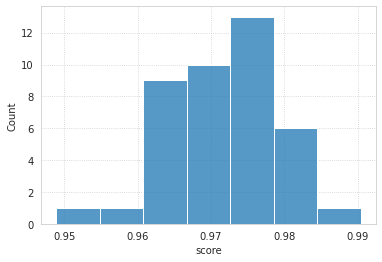

In [61]:
sns.histplot(test['score'])

In [62]:
test.iloc[[test['score'].argmax()]]

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 80 
 1 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.990382

In [79]:
key = 'sub-SLC01_ses-3'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)
m_indiv = mice.mask3d[key].get_data()
m_indiv = reg._prepare(m_indiv.astype('uint32'))

In [80]:
_dir = '/home/hadi/Dropbox/git/jb-Ca-fMRI/nb/sep21/sep26_dfs'
df = pd.read_pickle(pjoin(_dir, 'sub-SLC01_ses-3.df'))

In [90]:
mi = df.loc[df['metric'] == 'mi']
sym = df.loc[df['metric'] == 'sym']
mi = mi.reset_index(drop=True)
sym = sym.reset_index(drop=True)
cond = mi['score'] > np.nanquantile(mi['score'], 0.75)
_df = sym.loc[cond]

<AxesSubplot:xlabel='score', ylabel='Count'>

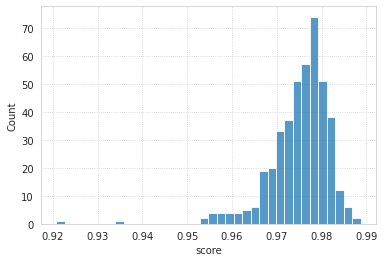

In [91]:
sns.histplot(sym['score'])

In [82]:
best_params = _df.iloc[_df['score'].argmax()]
best_params = best_params.drop(['metric', 'score'])
best_params = dict(zip(
    best_params.index,
    best_params.values,
))
best_params

{
    'seed': 4,
    'type': 'SyN',
    'grad': 0.3,
    'syn_bin': 16,
    'aff_bin': 13,
    'aff_rate': 0.2
}

In [85]:
_df = df.loc[
    (df['seed'] == 0) &
    (df['type'] == 'ElasticSyN') &
    (df['grad'] == 0.3) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 20) &
    (df['aff_rate'] == 0.2)
]
_df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 602 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 mi 
 0.463224 
 
 
 603 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_iso 
 0.996335 
 
 
 604 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_vis 
 0.965812 
 
 
 605 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_iso 
 0.965835 
 
 
 606 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_vis 
 0.989529 
 
 
 607 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym 
 0.988704 
 
 
 608 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp 
 0.971758 
 
 
 609 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 mi_fixed 
 0.325224 
 
 
 610 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_iso_fixed 
 0.993805 
 
 
 611 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_vis_fixed 
 0.970370 
 
 
 612 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_iso_fixed 
 1.000000 
 
 
 613 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_vis_fixed 
 1.000000 
 
 
 614 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 sym_fixed 
 0.987946 
 
 
 615 
 0 
 ElasticSyN 
 0.3 
 32 
 20 
 0.2 
 ovp_fixed 
 1.000000

<matplotlib.lines.Line2D object at 0x7e9fb43fbc40>

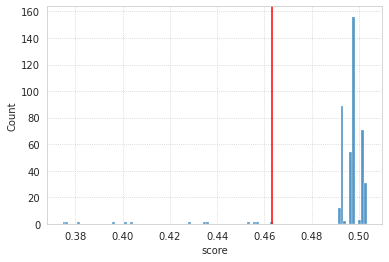

In [86]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])
plt.axvline(0.463224, color='r')

In [64]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='indiv2nissl',
    fixed=reg.nissl,
    moving=indiv,
    save_results=False,
    types=['ElasticSyN'],#, 'SyNAggro'],
    grads=[0.3],# [0.15, 0.2, 0.25, 0.3],
    syn_bins=[32],
    aff_bins=[20],
    aff_rates=[0.2],
    n_seeds=10,
)

  0%|          | 0/10 [00:00<?, ?it/s]

indiv2nissl, perf:
seed                 4
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             20
aff_rate           0.2
metric             sym
score         0.980975

In [65]:
iso_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.objects['ISO'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
vis_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.objects['VIS'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
ants.image_write(iso_yale, f"./iso_direct_{key}_Best.nii.gz")
ants.image_write(vis_yale, f"./vis_direct_{key}_Best.nii.gz")

In [4]:
_dir = '/home/hadi/Dropbox/git/jb-Ca-fMRI/nb/sep21/sep28'
df = pd.read_pickle(pjoin(_dir, 'yale-0.1.df'))

In [6]:
_df = df.loc[
    (df['seed'] == 1) &
    (df['type'] == 'SyNAggro') &
    (df['grad'] == 0.3) &
    (df['syn_bin'] == 32) &
    (df['aff_bin'] == 13) &
    (df['aff_rate'] == 0.8)
]
_df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 4009 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 mi 
 0.521271 
 
 
 4010 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_VIS 
 0.999773 
 
 
 4011 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_VIS 
 1.000000 
 
 
 4012 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_TEa 
 0.944390 
 
 
 4013 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_TEa 
 1.000000 
 
 
 4014 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_PTLp 
 0.982619 
 
 
 4015 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_PTLp 
 1.000000 
 
 
 4016 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_VISC 
 0.921525 
 
 
 4017 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_VISC 
 0.999464 
 
 
 4018 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_AI 
 0.937911 
 
 
 4019 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_AI 
 0.971646 
 
 
 4020 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_SS 
 0.973203 
 
 
 4021 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_SS 
 0.999780 
 
 
 4022 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_MO 
 0.997391 
 
 
 4023 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_MO 
 0.997580 
 
 
 4024 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym_ISO 
 0.998510 
 
 
 4025 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp_ISO 
 0.997187 
 
 
 4026 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 sym 
 0.978081 
 
 
 4027 
 1 
 SyNAggro 
 0.3 
 32 
 13 
 0.8 
 ovp 
 0.996751

In [7]:
mi = df.loc[df['metric'] == 'mi']
sym = df.loc[df['metric'] == 'sym']
mi = mi.reset_index(drop=True)
sym = sym.reset_index(drop=True)
cond = mi['score'] > np.nanquantile(mi['score'], 0.75)
_df = sym.loc[cond]

<AxesSubplot:xlabel='score', ylabel='Count'>

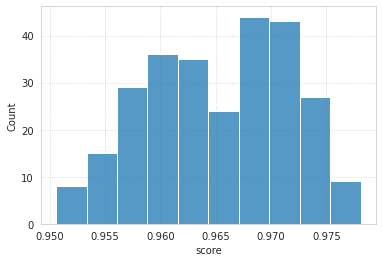

In [10]:
sns.histplot(_df['score'])

In [12]:
sym['score'].max(), mi['score'].max()

(0.9780812440341268, 0.5224554370642382)

In [13]:
mi.iloc[[mi['score'].argmax()]]

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 35 
 0 
 SyN 
 0.3 
 32 
 32 
 0.8 
 mi 
 0.522455

In [14]:
_df = sym.loc[
    (sym['seed'] == 1) &
    (sym['type'] == 'SyN') &
    (sym['grad'] == 0.3) &
    (sym['syn_bin'] == 32) &
    (sym['aff_bin'] == 32) &
    (sym['aff_rate'] == 0.8)
]
_df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 
 
 
 
 143 
 1 
 SyN 
 0.3 
 32 
 32 
 0.8 
 sym 
 0.975619

In [4]:
mice = Mice(Config(32), load_preproc=True)

from register.register import *
# reg = Register(mice, resolution=100)

In [5]:
allen = load_allen(resolution=25)
mice.allen = allen
reg = Register(mice, resolution=100)

In [6]:
reg.objects = reg.get_objects()

In [7]:
reg.objects

{
    'VIS': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'TEa': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'PTLp': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'VISC': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'AI': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'SS': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'MO': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'Isocortex': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'mask_l': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'mask_r': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

}

In [8]:
from bg_atlasapi import show_atlases, BrainGlobeAtlas

In [9]:
atlas = BrainGlobeAtlas('allen_mouse_25um')

allen mouse atlas (res. 25um)
From: http://www.brain-map.org (Wang et al 2020, https://doi.org/10.1016/j.cell.2020.04.007 )


In [10]:
atlas.left_hemisphere_value, atlas.right_hemisphere_value

(1, 2)

In [11]:
reg.objects['mask_r'] = reg.img_in_ccf(atlas.hemispheres == atlas.left_hemisphere_value, 'uint32')
reg.objects['mask_l'] = reg.img_in_ccf(atlas.hemispheres == atlas.right_hemisphere_value, 'uint32')

In [12]:
reg.in_house

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (160, 90, 118)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [13]:
reg.nissl

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [14]:
# ants.image_write(reg.nissl, './nissl_25.nii.gz')

In [16]:
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['VIS'],
    transformlist=_best_tx['invtransforms'],
    interpolator='genericLabel',
)
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['Isocortex'],
    transformlist=_best_tx['invtransforms'],
    interpolator='genericLabel',
)
ants.image_write(vis_yale, f"./vis_yale-{0.1}_25_Best.nii.gz")
ants.image_write(iso_yale, f"./iso_yale-{0.1}_25_Best.nii.gz")

In [17]:
_df_tx.drop('tx', axis=1).to_pickle(f"./yale-{0.1}_nissl-25.df")

In [43]:
_df_tx

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 tx 
 
 
 
 
 0 
 0 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515298 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1 
 0 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 sym_VIS 
 0.981283 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 2 
 0 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 ovp_VIS 
 1.000000 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 3 
 0 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 sym_TEa 
 0.978404 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 4 
 0 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 ovp_TEa 
 0.999051 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1135 
 9 
 SyNAggro 
 0.2 
 32 
 13 
 0.2 
 ovp_MO 
 0.997340 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1136 
 9 
 SyNAggro 
 0.2 
 32 
 13 
 0.2 
 sym_Isocortex 
 0.984365 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1137 
 9 
 SyNAggro 
 0.2 
 32 
 13 
 0.2 
 ovp_Isocortex 
 0.997063 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1138 
 9 
 SyNAggro 
 0.2 
 32 
 13 
 0.2 
 sym 
 0.983760 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1139 
 9 
 SyNAggro 
 0.2 
 32 
 13 
 0.2 
 ovp 
 0.996328 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 
 1140 rows × 9 columns

In [52]:
mi = _df_tx.loc[_df_tx['metric'] == 'mi']
sym = _df_tx.loc[_df_tx['metric'] == 'sym']
mi = mi.reset_index(drop=True)
sym = sym.reset_index(drop=True)

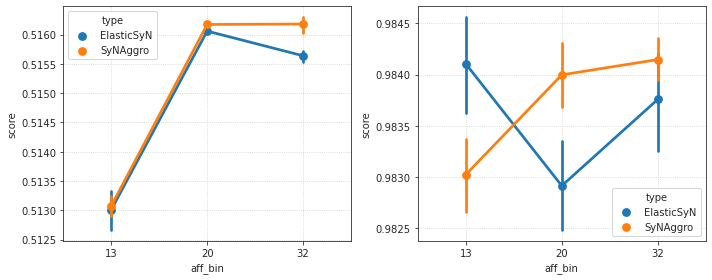

In [53]:
fig, axes = create_figure(1, 2, (10, 4))
sns.pointplot(data=mi, x='aff_bin', y='score', hue='type', ax=axes[0])
sns.pointplot(data=sym, x='aff_bin', y='score', hue='type', ax=axes[1])
for ax in axes.ravel():
    ax.grid()

In [ ]:
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['VIS'],
    transformlist=_best_tx['invtransforms'],
    interpolator='genericLabel',
)
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['Isocortex'],
    transformlist=_best_tx['invtransforms'],
    interpolator='genericLabel',
)
ants.image_write(vis_yale, f"./vis_yale-{0.1}_25_Best.nii.gz")
ants.image_write(iso_yale, f"./iso_yale-{0.1}_25_Best.nii.gz")

In [55]:
mi.loc[mi.type == 'ElasticSyN']

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 tx 
 
 
 
 
 0 
 0 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515298 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1 
 0 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516059 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 2 
 0 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.513040 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 6 
 1 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515834 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 7 
 1 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516073 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 8 
 1 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.513102 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 12 
 2 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515543 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 13 
 2 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516114 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 14 
 2 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.511793 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 18 
 3 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515756 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 19 
 3 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516110 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 20 
 3 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.512692 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 24 
 4 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515699 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 25 
 4 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.515998 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 26 
 4 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.513521 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 30 
 5 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515687 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 31 
 5 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516076 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 32 
 5 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.512578 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 36 
 6 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515567 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 37 
 6 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516080 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 38 
 6 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.513618 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 42 
 7 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515517 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 43 
 7 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.515984 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 44 
 7 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.513203 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 48 
 8 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515743 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 49 
 8 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.515978 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 50 
 8 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.512922 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 54 
 9 
 ElasticSyN 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.515741 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 55 
 9 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 mi 
 0.516128 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 56 
 9 
 ElasticSyN 
 0.2 
 32 
 13 
 0.2 
 mi 
 0.513644 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ...

In [95]:
cond = mi['score'] > np.nanquantile(mi['score'], 0.75)
_df = sym.loc[cond]

In [58]:
_df.loc[_df.type == 'ElasticSyN']

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 tx 
 
 
 
 
 13 
 2 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 sym 
 0.984099 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 55 
 9 
 ElasticSyN 
 0.2 
 32 
 20 
 0.2 
 sym 
 0.982180 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ...

In [60]:
print(_df.loc[13].to_string())

seed                                                        2
type                                               ElasticSyN
grad                                                      0.2
syn_bin                                                    32
aff_bin                                                    20
aff_rate                                                  0.2
metric                                                    sym
score                                                0.984099
tx          {'warpedmovout': ANTsImage (RAI)
         Pixel Type ...

In [62]:
tx = _df.loc[13, 'tx']
tx

{
    'warpedmovout': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'warpedfixout': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (160, 90, 118)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'fwdtransforms': [
        '/tmp/tmpo67udk4q1Warp.nii.gz',
        '/tmp/tmpo67udk4q0GenericAffine.mat'
    ],
    'invtransforms': [
        '/tmp/tmpo67udk4q0GenericAffine.mat',
        '/tmp/tmpo67udk4q1InverseWarp.nii.gz'
    ]
}

In [75]:
visYALE = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['VIS'],
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)
isoYALE = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['Isocortex'],
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)
isoYALE = reset_ants_img(
    img=isoYALE,
    origin=iso_yale.origin,
    spacing=iso_yale.spacing,
    dtype='uint32',
)
ants.image_write(visYALE, f"./visYALE-{0.1}_25_Best.nii.gz")
ants.image_write(isoYALE, f"./isoYALE-{0.1}_25_Best.nii.gz")

In [96]:
mi.iloc[[mi['score'].argmax()]]

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 tx 
 
 
 
 
 9 
 1 
 SyNAggro 
 0.2 
 32 
 32 
 0.2 
 mi 
 0.516381 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ...

In [98]:
_DFF = _df_tx.loc[
    (_df_tx.seed == 1) &
    (_df_tx.grad == 0.2) &
    (_df_tx.aff_bin == 32) &
    (_df_tx.type == 'SyNAggro')
]

In [105]:
tx = _DFF.loc[171, 'tx']
tx

{
    'warpedmovout': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'warpedfixout': ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (160, 90, 118)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'fwdtransforms': [
        '/tmp/tmp_05awneq1Warp.nii.gz',
        '/tmp/tmp_05awneq0GenericAffine.mat'
    ],
    'invtransforms': [
        '/tmp/tmp_05awneq0GenericAffine.mat',
        '/tmp/tmp_05awneq1InverseWarp.nii.gz'
    ]
}

In [106]:
vis_yale3 = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['VIS'],
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)
iso_yale3 = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['Isocortex'],
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)
iso_yale3 = reset_ants_img(
    img=iso_yale3,
    origin=iso_yale.origin,
    spacing=iso_yale.spacing,
    dtype='uint32',
)
ants.image_write(vis_yale3, f"./vis_yale-{0.1}_25_max_mi.nii.gz")
ants.image_write(iso_yale3, f"./iso_yale-{0.1}_25_max_mi.nii.gz")

## Affined

In [6]:
txfile = ants.affine_initializer(
    fixed_image=reg.nissl,
    moving_image=reg.in_house,
)

In [7]:
txfile

'/tmp/tmp9owt0znl.mat'

In [8]:
tx_aff = ants.read_transform(txfile, dimension=3)

In [9]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [10]:
yale_affined = tx_aff.apply_to_image(reg.in_house, reg.nissl)

In [11]:
yale_affined

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

<matplotlib.image.AxesImage object at 0x7f0647aaceb0>

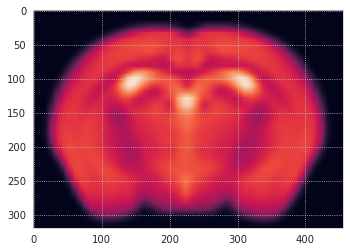

In [13]:
plt.imshow(yale_affined[250])

<matplotlib.image.AxesImage object at 0x7f0647a2fca0>

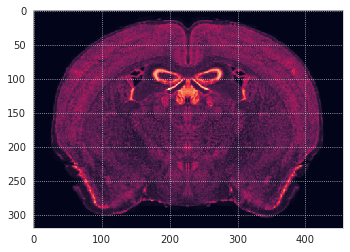

In [14]:
plt.imshow(reg.nissl[250])

In [15]:
reg.mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)

In [24]:
%timeit ants.image_mutual_information(reg.nissl, reg.nissl)

1min 6s ± 3.05 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
tx2 = ants.registration(
    fixed=reg.nissl,
    moving=yale_affined,
    type_of_transform='SyNAggro',
    aff_metric='GC',
    grad_step=0.2,
    syn_sampling=32,
    aff_sampling=16,
    aff_random_sampling_rate=0.2,
    random_seed=4,
    verbose=False,
)

In [17]:
scores = reg.tx_peformance(
    fixed=reg.nissl,
    tx=tx2,
    moving=yale_affined,
    tx_aff=tx_aff,
    moving_orig=reg.in_house,
)

In [18]:
scores

{
    'mi': 0.5045410467450004,
    'ovp_MOp': 1.0,
    'sym_MOp': 0.9929003418353931,
    'ovp_MOs': 1.0,
    'sym_MOs': 0.9892344497607656,
    'ovp_SS': 1.0,
    'sym_SS': 0.9672688422688422,
    'ovp_VISC': 1.0,
    'sym_VISC': 0.9758241758241758,
    'ovp_VIS': 1.0,
    'sym_VIS': 0.9704397981254507,
    'ovp_AI': 0.9996900666356733,
    'sym_AI': 0.9818796068796068,
    'ovp_PTLp': 1.0,
    'sym_PTLp': 0.9966887417218543,
    'ovp_TEa': 1.0,
    'sym_TEa': 0.9724137931034482,
    'ovp_CA1': 1.0,
    'sym_CA1': 0.998886104149262,
    'ovp_CLA': 1.0,
    'sym_CLA': 0.9514563106796117,
    'ovp_STRd': 1.0,
    'sym_STRd': 0.9982576500054449,
    'ovp_iso': 0.9999750040618399,
    'sym_iso': 0.9824826560951437,
    'sym': 0.9831409609006256,
    'ovp': 0.9999802351413913
}

In [ ]:
misc_yale_aff = ants.apply_transforms(
    fixed=yale_affined,
    moving=reg.objects['misc'],
    transformlist=tx2['invtransforms'],
    interpolator='genericLabel',
)
iso_yale_aff = ants.apply_transforms(
    fixed=yale_affined,
    moving=reg.objects['iso'],
    transformlist=tx2['invtransforms'],
    interpolator='genericLabel',
)

misc_yale_aff = tx_aff.invert().apply_to_image(misc_yale_aff, reg.in_house, interpolation='multilabel')
iso_yale_aff = tx_aff.invert().apply_to_image(iso_yale_aff, reg.in_house, interpolation='multilabel')

misc_yale_aff = reset_ants_img(
    img=misc_yale_aff,
    origin=misc_yale_aff.origin,
    spacing=misc_yale_aff.spacing,
    dtype='uint32',
)
iso_yale_aff = reset_ants_img(
    img=iso_yale_aff,
    origin=iso_yale_aff.origin,
    spacing=iso_yale_aff.spacing,
    dtype='uint32',
)
ants.image_write(misc_yale_aff, f"./misc_yale-{0.1}_10_aff_gc.nii.gz")
ants.image_write(iso_yale_aff, f"./iso_yale-{0.1}_10_aff_gc.nii.gz")

## Save tx_aff and tx2??

<matplotlib.image.AxesImage object at 0x7f654c5f33a0>

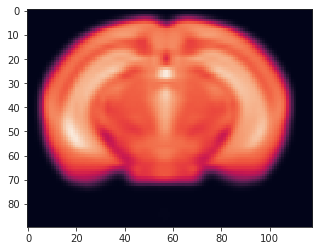

In [133]:
plt.imshow(yale_affined[80])

<matplotlib.image.AxesImage object at 0x7f654c21dfd0>

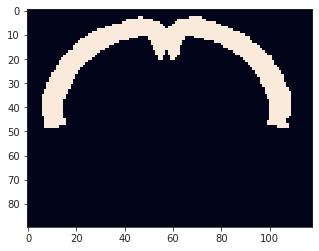

In [134]:
plt.imshow(iso_yale_aff[80])

In [153]:
iso_yale_prop = tx_aff.invert().apply_to_image(iso_yale_aff, interpolation='multilabel')

<matplotlib.image.AxesImage object at 0x7f63d8187910>

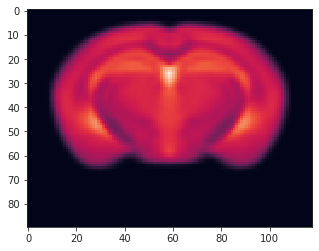

In [154]:
plt.imshow(reg.in_house[80])

<matplotlib.image.AxesImage object at 0x7f63d07a2190>

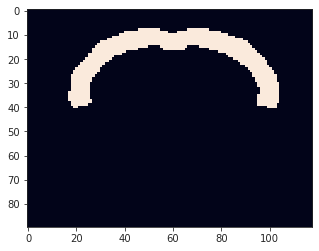

In [155]:
plt.imshow(iso_yale_prop[80])

In [157]:
vis_yale_aff = ants.apply_transforms(
    fixed=yale_affined,
    moving=reg.objects['VIS'],
    transformlist=tx2['invtransforms'],
    interpolator='genericLabel',
)
iso_yale_aff = ants.apply_transforms(
    fixed=yale_affined,
    moving=reg.objects['Isocortex'],
    transformlist=tx2['invtransforms'],
    interpolator='genericLabel',
)

vis_yale_aff = tx_aff.invert().apply_to_image(vis_yale_aff, interpolation='multilabel')
iso_yale_aff = tx_aff.invert().apply_to_image(iso_yale_aff, interpolation='multilabel')

iso_yale_aff = reset_ants_img(
    img=iso_yale_aff,
    origin=iso_yale.origin,
    spacing=iso_yale.spacing,
    dtype='uint32',
)
ants.image_write(vis_yale_aff, f"./vis_yale-{0.1}_25_aff.nii.gz")
ants.image_write(iso_yale_aff, f"./iso_yale-{0.1}_25_aff.nii.gz")

In [159]:
type(tx_aff)

<class 'ants.core.ants_transform.ANTsTransform'>

In [27]:
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['VIS'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['Isocortex'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
ants.image_write(vis_yale, f"./sep28/vis_yale-{0.1}_25_best.nii.gz")
ants.image_write(iso_yale, f"./sep28/iso_yale-{0.1}_25_best.nii.gz")

In [16]:
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['VIS'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.objects['Isocortex'],
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
ants.image_write(vis_yale, f"./sep28/vis_yale-{0.1}_50_best.nii.gz")
ants.image_write(iso_yale, f"./sep28/iso_yale-{0.1}_50_best.nii.gz")

In [ ]:
ants.image_write(reg.objects['Isocortex'], f"./iso_CCF.nii.gz")
ants.image_write(reg.objects['VIS'], f"./vis_CCF.nii.gz")

In [20]:
reg.objects['ISO']

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [10]:
_df = df_tx.loc[
    (df_tx['seed'] == 3) &
    (df_tx['type'] == 'ElasticSyN') &
    (df_tx['grad'] == 0.4) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 32) &
    (df_tx['aff_rate'] == 0.8)
]
_df

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 tx 
 
 
 
 
 2372 
 3 
 ElasticSyN 
 0.4 
 32 
 32 
 0.8 
 mi 
 0.563716 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 2373 
 3 
 ElasticSyN 
 0.4 
 32 
 32 
 0.8 
 sym_iso 
 0.998893 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 2374 
 3 
 ElasticSyN 
 0.4 
 32 
 32 
 0.8 
 sym_vis 
 0.987252 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 2375 
 3 
 ElasticSyN 
 0.4 
 32 
 32 
 0.8 
 sym 
 0.993072 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ...

<matplotlib.lines.Line2D object at 0x7ee56473d8e0>

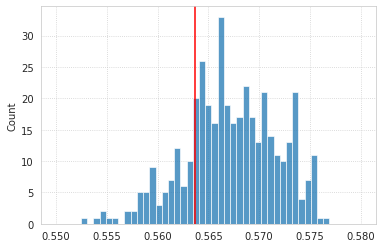

In [22]:
sns.histplot(df_tx.loc[df_tx['metric'] == 'mi', 'score'].values, bins=np.linspace(0.55, 0.58, 50))
plt.axvline(_df.iloc[0]['score'], color='r')

In [23]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.nissl,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)

mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5637,     iso: 0.9989,    vis: 0.9873

In [24]:
ants.image_write(iso_indiv, f"./{key}_iso_Best.nii.gz")
ants.image_write(vis_indiv, f"./{key}_vis_Best.nii.gz")

In [26]:
ants.image_write(iso_indiv * m_indiv, f"./{key}_iso-fixed_Best.nii.gz")
ants.image_write(vis_indiv * m_indiv, f"./{key}_vis-fixed_Best.nii.gz")

In [25]:
mi = ants.image_mutual_information(indiv, (warped * m_indiv))
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=(iso_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=(vis_indiv * m_indiv).numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.6238,     iso: 0.9936,    vis: 0.9923

- objective 1: find a criterion that returns the best fit
- objective 2: find other ones that are not the best (according to criterion in objective 1) but they look better if visualized
- objective 3: is it good enough to just choose the best performing one in objective 1? or should I revise the criterion?

In [27]:
df_tx

seed 
 type 
 grad 
 syn_bin 
 aff_bin 
 aff_rate 
 metric 
 score 
 tx 
 
 
 
 
 0 
 0 
 SyN 
 0.2 
 8 
 8 
 0.2 
 mi 
 0.302461 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 1 
 0 
 SyN 
 0.2 
 8 
 8 
 0.2 
 sym_iso 
 0.463862 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 2 
 0 
 SyN 
 0.2 
 8 
 8 
 0.2 
 sym_vis 
 0.001013 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 3 
 0 
 SyN 
 0.2 
 8 
 8 
 0.2 
 sym 
 0.232438 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 4 
 0 
 SyN 
 0.2 
 8 
 8 
 0.5 
 mi 
 0.561651 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 3235 
 4 
 SyNAggro 
 0.4 
 32 
 32 
 0.5 
 sym 
 0.963747 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 3236 
 4 
 SyNAggro 
 0.4 
 32 
 32 
 0.8 
 mi 
 0.563454 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 3237 
 4 
 SyNAggro 
 0.4 
 32 
 32 
 0.8 
 sym_iso 
 0.967274 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 3238 
 4 
 SyNAggro 
 0.4 
 32 
 32 
 0.8 
 sym_vis 
 0.997195 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 3239 
 4 
 SyNAggro 
 0.4 
 32 
 32 
 0.8 
 sym 
 0.982235 
 {'warpedmovout': ANTsImage (RAI)
 Pixel Type ... 
 
 
 
 3240 rows × 9 columns

In [ ]:
types=['SyN', 'ElasticSyN', 'SyNAggro'],
grads=[0.2, 0.4],
syn_bins=[8, 16, 32],
aff_bins=[8, 16, 32],
aff_rates=[0.2, 0.5, 0.8],
n_seeds=5,

<seaborn.axisgrid.FacetGrid object at 0x7ee56472a430>

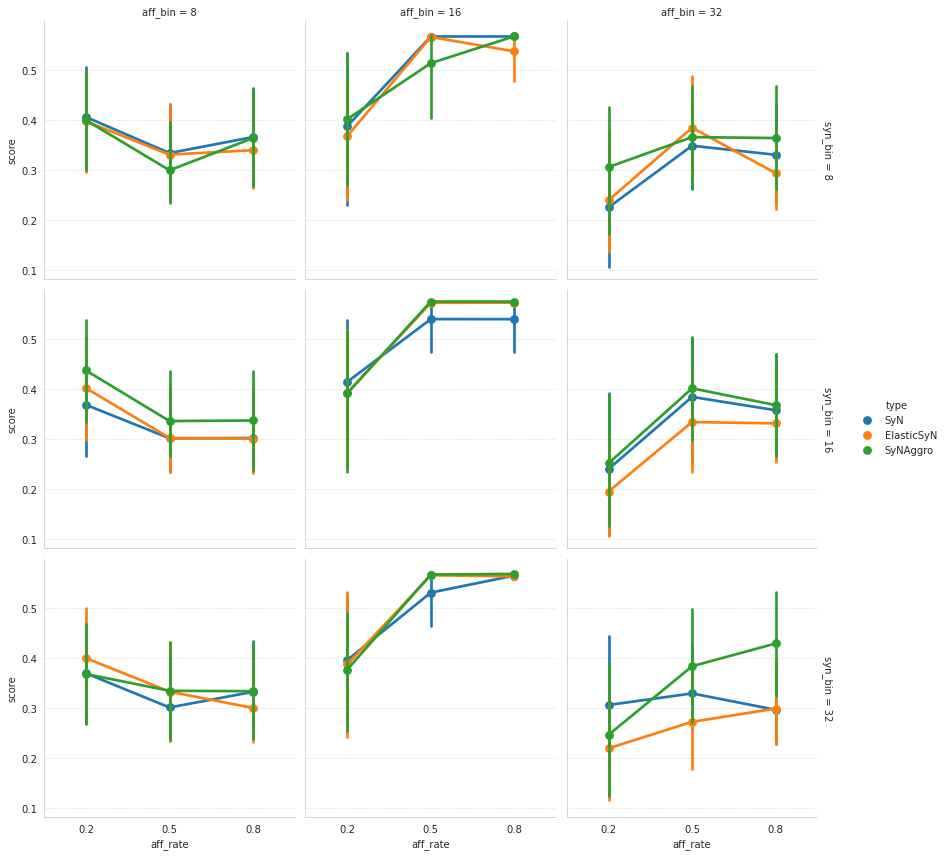

In [29]:
sns.catplot(
    data=df_tx.loc[df_tx['metric'] == 'mi'],
    x='aff_rate',
    y='score',
    hue='type',
    row='syn_bin',
    col='aff_bin',
    kind='point',
    margin_titles=True,
    size=4,
)

<seaborn.axisgrid.FacetGrid object at 0x7ee56474c880>

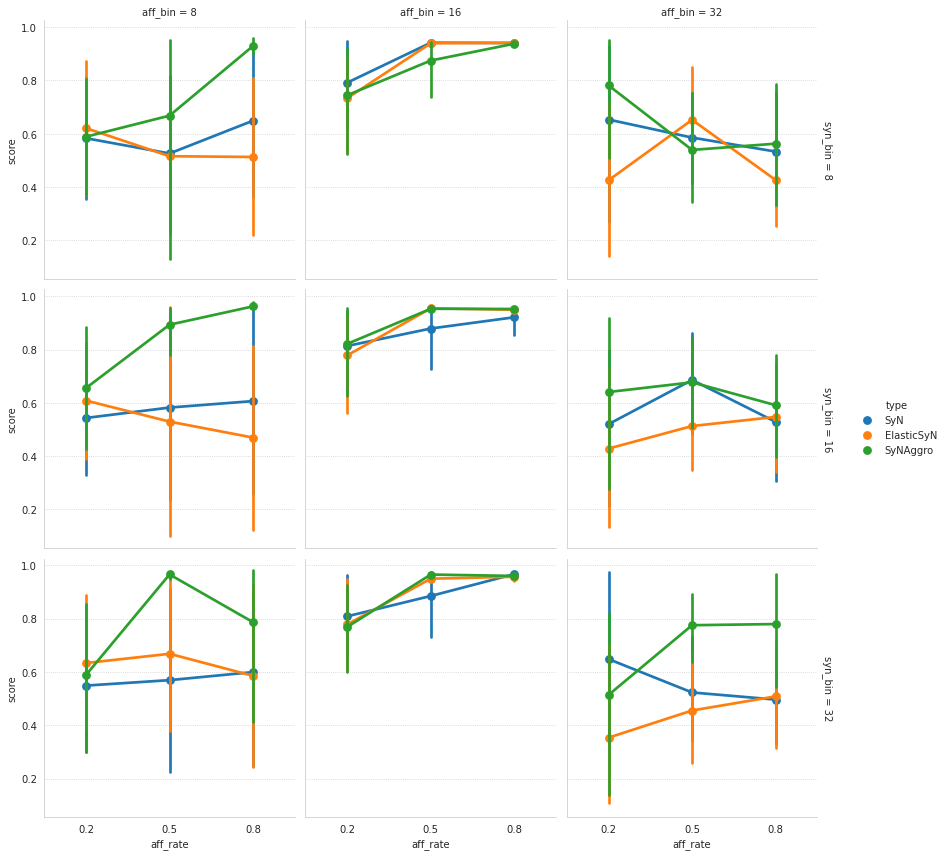

In [31]:
sns.catplot(
    data=df_tx.loc[df_tx['metric'] == 'sym'],
    x='aff_rate',
    y='score',
    hue='type',
    row='syn_bin',
    col='aff_bin',
    kind='point',
    margin_titles=True,
    size=4,
)

In [32]:
df = df_tx.loc[df_tx['aff_bin'] == 16]

<seaborn.axisgrid.FacetGrid object at 0x7ee534114040>

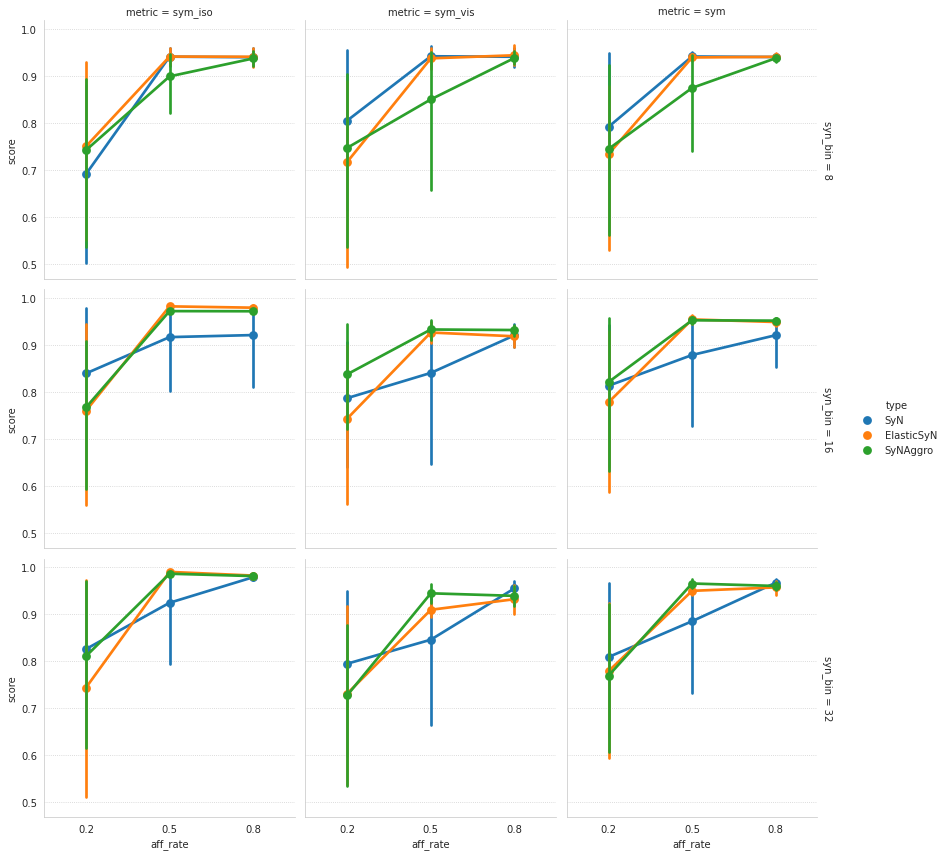

In [35]:
sns.catplot(
    data=df.loc[df['metric'] != 'mi'],
    x='aff_rate',
    y='score',
    col='metric',
    row='syn_bin',
    hue='type',
    kind='point',
    margin_titles=True,
    size=4,
)

In [36]:
df = df_tx.loc[
    (df_tx['aff_bin'] == 16) &
    (df_tx['syn_bin'] == 16)
]

<seaborn.axisgrid.FacetGrid object at 0x7ee4c87dd250>

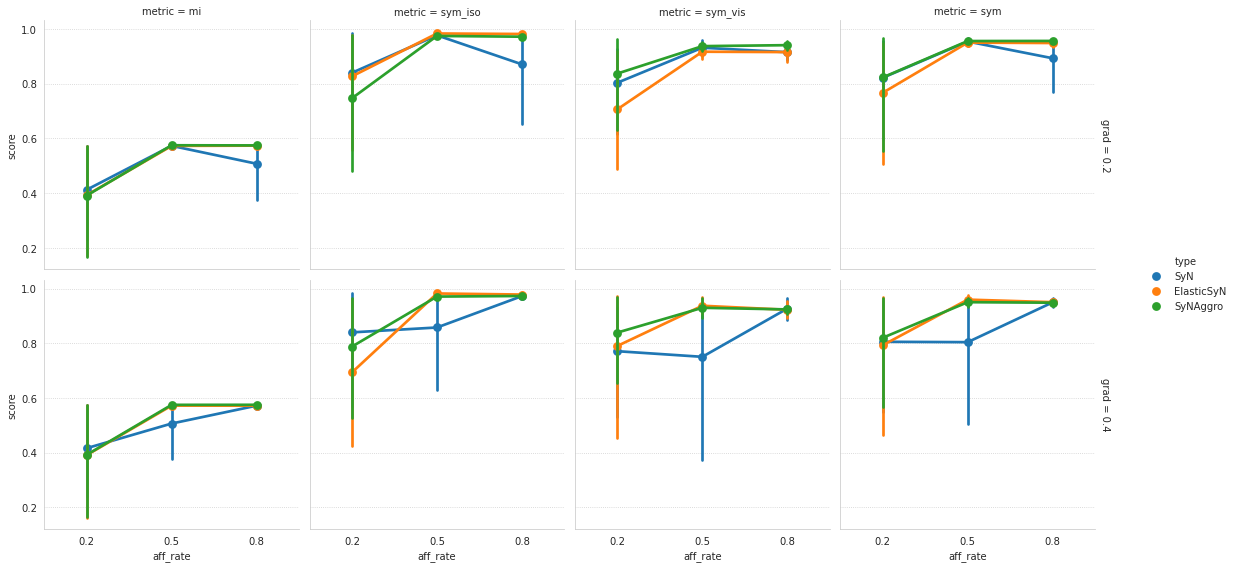

In [39]:
sns.catplot(
    data=df,
    x='aff_rate',
    y='score',
    col='metric',
    row='grad',
    hue='type',
    kind='point',
    margin_titles=True,
    size=4,
)